In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

"safadaf"[-10:]

c:\users\endre\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\endre\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\endre\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'safadaf'

In [6]:
def aggregate_predsV2(fold_predsFile):
    fold_preds = pd.read_csv(fold_predsFile+"/preds.csv")
    aggregate_pred = fold_preds['0'].copy()
    acc = [None] * 10
    mse = [None] * 10
    for i in range(0,10):
        acc[i] = accuracy_score(fold_preds[str(i)].round().astype("int"), y_true.age)
        mse[i] = mean_squared_error(fold_preds[str(i)], y_true.age)
        if i >= 1:
            aggregate_pred += fold_preds[str(i)]

    aggregate_pred = aggregate_pred/10.0    
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), y_true.age)
    mse_mean = mean_squared_error(aggregate_pred, y_true.age)
    print(fold_predsFile+ ":\t\t\t\t"+str(acc_mean) + " " + str(mse_mean))
    return acc, acc_mean, mse, mse_mean, aggregate_pred, fold_preds

def aggregate_predsV1(fold_predsFile):
    t = [None] * 10
    for i in range(0,10):
        t[i] = pd.read_csv(fold_predsFile+"/test_set_"+str(i)+".csv") 
    
    acc = [None] * 10
    mse = [None] * 10
    aggregate_pred = t[0].y_pred_test.values.copy()
    for i in range(0, 10):
        acc[i] = accuracy_score(t[i].y_pred_test.values.round().astype("int"), t[0].y_true)
        mse[i] = mean_squared_error(t[i].y_pred_test.values, t[0].y_true)
        if i >= 1:
            aggregate_pred += t[i].y_pred_test.values

    aggregate_pred = aggregate_pred/10.0
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), t[0].y_true)
    mse_mean = mean_squared_error(aggregate_pred, t[0].y_true)
    print(fold_predsFile[-38:]+":\t\t"+str( acc_mean ) + " "+ str( mse_mean ) ) 
    return acc, acc_mean, mse, mse_mean, aggregate_pred, t
    
y_true = pd.read_csv("EFFNetV2_m_MLP_all/test_set_files.csv")

print("aggregate accuracy, mse")

lMinAcc, lMinAccMean, lMinMSE, lMinMSEMean, l_min, l_i = aggregate_predsV2( "EFFNetV2_l_min_mse" )
lMiddleAcc, lMiddleAccMean, lMiddleMSE, lMiddleMSEMean, l_middle, l_d = aggregate_predsV2( "EFFNetV2_l_middle_mse" )
lMaxAcc, lMaxAccMean, lMaxMSE, lMaxMSEMean, l_max, l_x = aggregate_predsV2( "EFFNetV2_l_max_mse" )
lAllAcc, lAllAccMean, lAllMSE, lAllMSEMean, l_all, l_a = aggregate_predsV2( "EFFNetV2_l_all_mse" )

mMinAcc, mMinAccMean, mMinMSE, mMinMSEMean, m_min, m_i = aggregate_predsV2( "EFFNetV2_m_min_mse" )
mMiddleAcc, mMiddleAccMean, mMiddleMSE, mMiddleMSEMean, m_middle, m_d = aggregate_predsV2( "EFFNetV2_m_middle_mse" )
mMaxAcc, mMaxAccMean, mMaxMSE, mMaxMSEMean, m_max, m_x = aggregate_predsV2( "EFFNetV2_m_max_mse" )
mAllAcc, mAllAccMean, mAllMSE, mAllMSEMean, m_all, m_a = aggregate_predsV2( "EFFNetV2_m_MLP_all" )

B4MinAcc, B4MinAccMean, B4MinMSE, B4MinMSEMean, b4_min, b4_i = aggregate_predsV1( "tf_EFFNetB4_groupkfold_stdScalar_10_test2" )
B4MiddleAcc, B4MiddleAccMean, B4MiddleMSE, B4MiddleMSEMean, b4_middle, b4_d = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_middle" )
B4MaxAcc, B4MaxAccMean, B4MaxMSE, B4MaxMSEMean, b4_max, b4_x = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_max" )

B5MinAcc, B5MinAccMean, B5MinMSE, B5MinMSEMean, b5_min, b5_i = aggregate_predsV1( "tf_EFFNetB5_2_groupkfold_stdScalar_10_test_min" )
B5MiddleAcc, B5MiddleAccMean, B5MiddleMSE, B5MiddleMSEMean, b5_middle, b5_d = aggregate_predsV1( "tf_EFFNetB5_groupkfold_stdScalar_10_test_middle" )
B5MaxAcc, B5MaxAccMean, B5MaxMSE, B5MaxMSEMean, b5_max, b5_x = aggregate_predsV1( "tf_EFFNetB5_groupkfold_stdScalar_10_test_max" )

B6MinAcc, B6MinAccMean, B6MinMSE, B6MinMSEMean, b6_min, b6_i = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_min" )
B6MiddleAcc, B6MiddleAccMean, B6MiddleMSE, B6MiddleMSEMean, b6_middle, b6_d = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_middle" )
B6MaxAcc, B6MaxAccMean, B6MaxMSE, B6MaxMSEMean, b6_max, b6_x = aggregate_predsV1( "EFFNetB6_groupkfold_stdScalar_10_test_max" )

#all_cnns = l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_middle,b6_min,b6_middle,b6_max
all_cnns_acc = [B4MinAcc, B5MinAcc, B6MinAcc, mMinAcc, lMinAcc, B4MiddleAcc, B5MiddleAcc, B6MiddleAcc, mMiddleAcc, lMiddleAcc,  B4MaxAcc, B5MaxAcc, B6MaxAcc, mMaxAcc, lMaxAcc,mAllAcc,lAllAcc]
all_cnns = b4_min, b5_min, b6_min, m_min, l_min, b4_middle, b5_middle, b6_middle, m_middle, l_middle, b4_max, b5_max, b6_max, m_max, l_max, m_all, l_all
all_kfold_cnns = b4_i, b5_i, b6_i, m_i, l_i, b4_d, b5_d, b6_d, m_d, l_d, b4_x, b5_x, b6_x, m_x, l_x, m_a, l_a

aggregate accuracy, mse
EFFNetV2_l_min_mse:				0.7203883495145631 0.27984743881004925
EFFNetV2_l_middle_mse:				0.7281553398058253 0.2749396896282028
EFFNetV2_l_max_mse:				0.7242718446601941 0.28599091634838775
EFFNetV2_l_all_mse:				0.7223300970873786 0.27061980996288926
EFFNetV2_m_min_mse:				0.7398058252427184 0.2733061445705727
EFFNetV2_m_middle_mse:				0.7223300970873786 0.2753004481257845
EFFNetV2_m_max_mse:				0.7126213592233009 0.2891016447191845
EFFNetV2_m_MLP_all:				0.7398058252427184 0.2728000533332227
EFFNetB4_groupkfold_stdScalar_10_test2:		0.7281553398058253 0.27677442836796534
EFFNetB4_groupkfold_stdScalar_middle:		0.7145631067961165 0.2847701138075624
EFFNetB4_groupkfold_stdScalar_max:		0.7087378640776699 0.2908639084032022
tB5_2_groupkfold_stdScalar_10_test_min:		0.7436893203883496 0.2770159431240281
B5_groupkfold_stdScalar_10_test_middle:		0.7339805825242719 0.2731098431413754
NetB5_groupkfold_stdScalar_10_test_max:		0.7320388349514563 0.3587137165456544
NetB6_group

In [4]:
B6MinAccMean

0.7339805825242719

### Chi-squared and t-test of 10-fold crossvalidation prediction

In [7]:
data = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]
stats.ttest_1samp(a=data, popmean=15)

NameError: name 'stats' is not defined

In [8]:
from scipy import stats
import scipy.stats

min_p_values = np.zeros((17,17))
for i in range(0,17): 
    for j in range(i+1,17): 
        a = all_cnns_acc[i]
        print(a)
        b = all_cnns_acc[j]
        stats = scipy.stats.ttest_ind(a, b, equal_var=False)
        min_p_values[i,j] = stats.pvalue
        
np.set_printoptions(precision=2)        
print(min_p_values)
#all_cnns_acc = all_cnns_acc *100 
#print(all_cnns_acc)
#print(np.mean(all_cnns_acc))
#popmean =  np.mean(all_cnns_acc)
#print(popmean)
#print(type(data))
#v = stats.ttest_1samp(all_cnns_acc, popmean, axis=0)
#print(v)

[0.6990291262135923, 0.6893203883495146, 0.6873786407766991, 0.683495145631068, 0.6893203883495146, 0.7009708737864078, 0.6970873786407767, 0.6679611650485436, 0.6893203883495146, 0.7242718446601941]
[0.6990291262135923, 0.6893203883495146, 0.6873786407766991, 0.683495145631068, 0.6893203883495146, 0.7009708737864078, 0.6970873786407767, 0.6679611650485436, 0.6893203883495146, 0.7242718446601941]
[0.6990291262135923, 0.6893203883495146, 0.6873786407766991, 0.683495145631068, 0.6893203883495146, 0.7009708737864078, 0.6970873786407767, 0.6679611650485436, 0.6893203883495146, 0.7242718446601941]
[0.6990291262135923, 0.6893203883495146, 0.6873786407766991, 0.683495145631068, 0.6893203883495146, 0.7009708737864078, 0.6970873786407767, 0.6679611650485436, 0.6893203883495146, 0.7242718446601941]
[0.6990291262135923, 0.6893203883495146, 0.6873786407766991, 0.683495145631068, 0.6893203883495146, 0.7009708737864078, 0.6970873786407767, 0.6679611650485436, 0.6893203883495146, 0.7242718446601941]


In [9]:
#all_kfold_cnns[3]['0'].values
y_true.age
y_true_count = np.zeros(13)
for i in range(1,14):
    y_true_count[i-1] = (y_true.age == i).sum()
    
y_true_count = y_true_count.astype('int')
print(y_true_count)

age_ratio = y_true_count / len(y_true.age)
print(age_ratio)

[41 59 52 60 90 52 55 47 23 19 13  2  2]
[0.08 0.11 0.1  0.12 0.17 0.1  0.11 0.09 0.04 0.04 0.03 0.   0.  ]


In [10]:
# chi-squared test
import scipy.stats

for i in range(0,1): #(0,2):
    for k in range(0,10):
        a = all_kfold_cnns[i]
        if i in [3, 4, 8, 9, 13, 14, 15, 16]:
            a = a[str(k)].values
        else:
            a = a[k].y_pred_test.values
            
        a_rounded = a.round().astype('int')
            
        #chi-squared test
        count_a = np.zeros(13)
        for i in range(1,14):
            count_a[i-1] = (a_rounded == i).sum()

        count_a = count_a.astype('int')

        observed = count_a / len(y_true.age)
        true_ratios = age_ratio
        expected  = age_ratio
        #print(observed)
        #print(expected)
        chi_squared_stat = ((observed-expected)**2/expected).sum()       
        #print(chi_squared_stat)
        
        crit = scipy.stats.chi2.ppf ( q = 0.95, df = 12)
        p_value = 1 - scipy.stats.chi2.cdf( x = chi_squared_stat, df=12)
        print(p_value)

1.0
0.9999999999999976
0.999999999999998
0.9999999999999999
0.9999999999999984
0.999999999999999
0.9999999999999999
0.9999999999999828
0.9999999999999999
0.9999999999999998


(array([100.,  52.,  60.,  90.,  52., 102.,  23.,  19.,  13.,   4.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

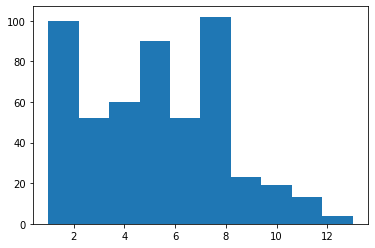

In [267]:
plt.hist(y_true.age)

In [11]:
#3, 4, 8, 9, 13, 14, 15, 16
import scipy.stats

tmp = np.zeros(100)
count = 0
min_p_values = np.zeros((17,17))
for i in range(0,17): #(0,2):
    for j in range(i+1,17): #(i+1, 17):
        for k in range(0,10):
            for l in range(0,10):
                a = all_kfold_cnns[i]
                b = all_kfold_cnns[j]
                if i in [3, 4, 8, 9, 13, 14, 15, 16]:
                    a = a[str(k)].values
                else:
                    a = a[k].y_pred_test.values

                if j in [3, 4, 8, 9, 13, 14, 15, 16]:
                    b = b[str(l)].values
                else:
                    b = b[l].y_pred_test.values
                
                a_rounded = a.round().astype('int')
                b_rounded = b.round().astype('int')
                
                #t-test
                #stats = scipy.stats.ttest_ind(a.round().astype('int'), b.round().astype('int'), equal_var=False)
                stats = scipy.stats.ttest_ind(a, b, equal_var=False)
                pvalue = stats.pvalue
                tmp[count] = pvalue
                count += 1

                    
        min_p_values[i,j] = np.min(tmp)
        tmp = np.zeros(100)
        count = 0

print(min_p_values)

[[0.   0.34 0.13 0.35 0.26 0.25 0.34 0.37 0.31 0.24 0.25 0.38 0.32 0.22
  0.19 0.23 0.27]
 [0.   0.   0.2  0.43 0.32 0.36 0.47 0.45 0.38 0.3  0.31 0.46 0.44 0.28
  0.24 0.28 0.33]
 [0.   0.   0.   0.18 0.12 0.17 0.29 0.19 0.15 0.11 0.12 0.2  0.21 0.1
  0.09 0.11 0.13]
 [0.   0.   0.   0.   0.6  0.32 0.43 0.69 0.69 0.58 0.52 0.47 0.4  0.55
  0.49 0.56 0.62]
 [0.   0.   0.   0.   0.   0.24 0.32 0.55 0.69 0.51 0.4  0.36 0.3  0.53
  0.55 0.44 0.64]
 [0.   0.   0.   0.   0.   0.   0.41 0.34 0.29 0.22 0.23 0.36 0.36 0.21
  0.18 0.21 0.25]
 [0.   0.   0.   0.   0.   0.   0.   0.45 0.39 0.31 0.31 0.47 0.47 0.29
  0.25 0.29 0.34]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.63 0.53 0.53 0.49 0.42 0.5
  0.44 0.5  0.57]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.59 0.46 0.42 0.36 0.61
  0.57 0.52 0.7 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.34 0.28 0.46
  0.41 0.42 0.52]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.34 0.29 0.35
  0.31 0.36 0.41]
 [0.   0.   

In [12]:
stats = scipy.stats.ttest_ind(tmp[0].y_pred_test.values, m_i['0'].values, equal_var=False)
#tmp[0].y_pred_test.values
#m_i['0'].values


#tmp[0].y_pred_test.values
#m_i['0'].values
#type(tmp)
#type(m_i)
print(stats)

AttributeError: 'numpy.float64' object has no attribute 'y_pred_test'

 ### T-statistics of folds

In [13]:
import scipy.stats

mat = np.asarray(all_cnns)
mat.shape

p_values = np.ones((17,17))
for i in range(0,17):
    for j in range(i+1, 17):
        stats = scipy.stats.ttest_ind(mat[i,:], mat[j,:], equal_var=False)
        p_values[i,j] = stats.pvalue
        
#print(stats.ttest_ind(mat[0,:], mat[1,:]))
#print(stats.ttest_ind(mat[0,:], mat[1,:], equal_var=False))
np.set_printoptions(precision=2)
print(p_values)


[[1.   0.98 0.93 0.73 0.61 0.89 0.94 0.84 0.66 0.67 0.84 0.99 0.94 0.67
  0.59 0.69 0.63]
 [1.   1.   0.9  0.71 0.59 0.87 0.96 0.82 0.64 0.65 0.82 0.99 0.92 0.65
  0.57 0.67 0.61]
 [1.   1.   1.   0.8  0.68 0.96 0.86 0.91 0.73 0.74 0.92 0.92 0.99 0.74
  0.65 0.76 0.69]
 [1.   1.   1.   1.   0.87 0.84 0.67 0.89 0.93 0.93 0.89 0.72 0.79 0.93
  0.84 0.95 0.89]
 [1.   1.   1.   1.   1.   0.71 0.56 0.76 0.94 0.93 0.76 0.6  0.67 0.94
  0.97 0.91 0.98]
 [1.   1.   1.   1.   1.   1.   0.83 0.95 0.77 0.78 0.95 0.88 0.95 0.78
  0.69 0.8  0.73]
 [1.   1.   1.   1.   1.   1.   1.   0.78 0.61 0.61 0.78 0.94 0.88 0.61
  0.53 0.63 0.57]
 [1.   1.   1.   1.   1.   1.   1.   1.   0.81 0.82 1.   0.83 0.9  0.82
  0.73 0.84 0.78]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   0.99 0.81 0.65 0.72 0.99
  0.91 0.97 0.96]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.82 0.66 0.73 1.
  0.9  0.98 0.95]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.84 0.9  0.82
  0.73 0.84 0.78]
 [1.   1.   

### Percentage agreement - PA

In [3]:
mat = np.asarray(all_cnns)
#mat[0:17, 0:5]
y_true1 = np.mean(mat, axis=0)
y_true2 =y_true1.round().astype(int)
score = accuracy_score(y_true2, y_true.age)
print(score)
#0.7475728155339806

mat1 = mat.round().astype('int')
filter = np.tile(y_true2, (17,1))
print(filter.shape)
print(mat1.shape)
print(filter[0:17,0])
print(mat1[0:17, 0])

PA = (mat1==filter).astype('int')
#print(PA)
print(np.mean(PA, axis=1))
#b4_min, b5_min, b6_min, m_min, l_min,
#b4_middle, b5_middle, b6_middle, m_middle, l_middle, b4_max, b5_max, b6_max, m_max, l_max, m_all, l_all
#| 89.5 | 89.3 | 88.2 | 89.7 | 89.9 |
#| 88.2 | 89.5 | 90.9 | 91.1 | 87.8 |
#| 87.6 | 90.5 | 88.0 | 89.5 | 90.3 |
#| -   | -    | -    | 91.3 | 91.1 |

0.7475728155339806
(17, 515)
(17, 515)
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
[10  9  9  9  9 10  9  9  8  9  9  9  9  9  9  9  9]
[0.89514563 0.89320388 0.8815534  0.89708738 0.89902913 0.8815534
 0.89514563 0.90873786 0.91067961 0.8776699  0.87572816 0.90485437
 0.87961165 0.89514563 0.90291262 0.91262136 0.91067961]


### Four-year-olds from test-set

In [19]:
mean_predictions = y_true1[[29, 46, 57, 61, 76, 89, 91, 113, 117, 129]]
idx = np.argsort(mean_predictions)
sorted = np.sort(mean_predictions)
print(sorted)
print(idx)
print(y_true.age[[29, 46, 57, 61, 76, 89, 91, 113, 117, 129]])

[3.31450753 3.49227889 3.69675781 3.80740492 3.83693663 3.99241472
 4.00144231 4.04727426 4.77138502 4.96491232]
[2 6 3 0 7 5 4 9 8 1]
29     4
46     4
57     4
61     4
76     4
89     4
91     4
113    4
117    4
129    4
Name: age, dtype: int64


### Summary over all models

[0.7203883495145631, 0.7281553398058253, 0.7242718446601941, 0.7223300970873786, 0.7398058252427184, 0.7223300970873786, 0.7126213592233009, 0.7398058252427184, 0.7281553398058253, 0.7145631067961165, 0.7087378640776699, 0.7436893203883496, 0.7339805825242719, 0.7320388349514563, 0.7339805825242719, 0.7436893203883496, 0.7145631067961165]


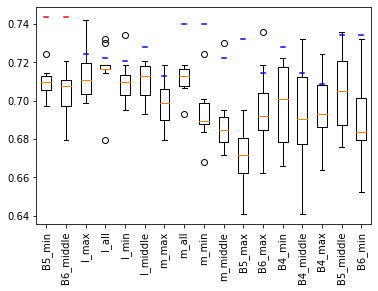

In [21]:
plt.boxplot([lMinAcc, lMiddleAcc, lMaxAcc, lAllAcc, 
             mMinAcc, mMiddleAcc, mMaxAcc, mAllAcc, 
             B4MinAcc, B4MiddleAcc, B4MaxAcc, 
             B5MinAcc, B5MiddleAcc, B5MaxAcc,
             B6MinAcc, B6MiddleAcc, B6MaxAcc])
print([lMinAccMean, lMiddleAccMean, lMaxAccMean, lAllAccMean, 
             mMinAccMean, mMiddleAccMean, mMaxAccMean, mAllAccMean, 
             B4MinAccMean, B4MiddleAccMean, B4MaxAccMean, 
             B5MinAccMean, B5MiddleAccMean, B5MaxAccMean,
             B6MinAccMean, B6MiddleAccMean, B6MaxAccMean])
plt.plot([0.9, 1.1], [B5MinAccMean, B5MinAccMean], 'r')
plt.plot([1.9, 2.1], [B6MiddleAccMean, B6MiddleAccMean], 'r')
plt.plot([2.9, 3.1], [lMaxAccMean, lMaxAccMean], 'b')
plt.plot([3.9, 4.1], [lAllAccMean, lAllAccMean], 'b')
plt.plot([4.9, 5.1], [lMinAccMean, lMinAccMean], 'b')
plt.plot([5.9, 6.1], [lMiddleAccMean, lMiddleAccMean], 'b')
plt.plot([6.9, 7.1], [mMaxAccMean, mMaxAccMean], 'b')
plt.plot([7.9, 8.1], [mAllAccMean, mAllAccMean], 'b')
plt.plot([8.9, 9.1], [mMinAccMean, mMinAccMean], 'b')
plt.plot([9.9, 10.1], [mMiddleAccMean, mMiddleAccMean], 'b')
plt.plot([10.9, 11.1], [B5MaxAccMean, B5MaxAccMean], 'b')
plt.plot([11.9, 12.1], [B6MaxAccMean, B6MaxAccMean], 'b')
plt.plot([12.9, 13.1], [B4MinAccMean, B4MinAccMean], 'b')
plt.plot([13.9, 14.1], [B4MiddleAccMean, B4MiddleAccMean], 'b')
plt.plot([14.9, 15.1], [B4MaxAccMean, B4MaxAccMean], 'b')
plt.plot([15.9, 16.1], [B5MiddleAccMean, B5MiddleAccMean], 'b')
plt.plot([16.9, 17.1], [B6MinAccMean, B6MinAccMean], 'b')
plt.xticks(range(1,18), ["B5_min", "B6_middle", "l_max", "l_all", "l_min", "l_middle", "m_max", "m_all", "m_min", "m_middle",
                         "B5_max", "B6_max", "B4_min", "B4_middle", "B4_max", "B5_middle", "B6_min"], rotation = 90)

#b5-min, b6-mid, l-max, l-all, l-min, l-middle, m-max, m-all, m-min, m-mid, 
#b5-max, b6-max, b4-min, b4-mid, b4-max, b5-mid, b6-min

#plt.xticks(range(1,18), ["lMin","lMiddle","lMax","lAll","mMin","mMiddle","mMax","mAll","B4Min","B4Middle","B4Max"
#                         ,"B5Min","B5Middle","B5Max","B6Min","B6Middle","B6Max"], rotation = 45)


plt.show()

[0.27984743881004925, 0.2749396896282028, 0.28599091634838775, 0.27061980996288926, 0.2733061445705727, 0.2753004481257845, 0.2891016447191845, 0.2728000533332227, 0.27677442836796534, 0.2847701138075624, 0.2908639084032022, 0.2770159431240281, 0.2731098431413754, 0.3587137165456544, 0.272170267061415, 0.2622701387186297, 0.30471818752107327]


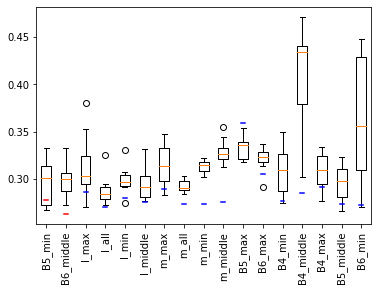

In [20]:
plt.boxplot([lMinMSE, lMiddleMSE, lMaxMSE, lAllMSE, 
             mMinMSE, mMiddleMSE, mMaxMSE, mAllMSE, 
             B4MinMSE, B4MiddleMSE, B4MaxMSE, 
             B5MinMSE, B5MiddleMSE, B5MaxMSE,
             B6MinMSE, B6MiddleMSE, B6MaxMSE])
print([lMinMSEMean, lMiddleMSEMean, lMaxMSEMean, lAllMSEMean, 
             mMinMSEMean, mMiddleMSEMean, mMaxMSEMean, mAllMSEMean, 
             B4MinMSEMean, B4MiddleMSEMean, B4MaxMSEMean, 
             B5MinMSEMean, B5MiddleMSEMean, B5MaxMSEMean,
             B6MinMSEMean, B6MiddleMSEMean, B6MaxMSEMean])

plt.plot([0.9, 1.1], [B5MinMSEMean, B5MinMSEMean], 'r')
plt.plot([1.9, 2.1], [B6MiddleMSEMean, B6MiddleMSEMean], 'r')
plt.plot([2.9, 3.1], [lMaxMSEMean, lMaxMSEMean], 'b')
plt.plot([3.9, 4.1], [lAllMSEMean, lAllMSEMean], 'b')
plt.plot([4.9, 5.1], [lMinMSEMean, lMinMSEMean], 'b')
plt.plot([5.9, 6.1], [lMiddleMSEMean, lMiddleMSEMean], 'b')
plt.plot([6.9, 7.1], [mMaxMSEMean, mMaxMSEMean], 'b')
plt.plot([7.9, 8.1], [mAllMSEMean, mAllMSEMean], 'b')
plt.plot([8.9, 9.1], [mMinMSEMean, mMinMSEMean], 'b')
plt.plot([9.9, 10.1], [mMiddleMSEMean, mMiddleMSEMean], 'b')
plt.plot([10.9, 11.1], [B5MaxMSEMean, B5MaxMSEMean], 'b')
plt.plot([11.9, 12.1], [B6MaxMSEMean, B6MaxMSEMean], 'b')
plt.plot([12.9, 13.1], [B4MinMSEMean, B4MinMSEMean], 'b')
plt.plot([13.9, 14.1], [B4MiddleMSEMean, B4MiddleMSEMean], 'b')
plt.plot([14.9, 15.1], [B4MaxMSEMean, B4MaxMSEMean], 'b')
plt.plot([15.9, 16.1], [B5MiddleMSEMean, B5MiddleMSEMean], 'b')
plt.plot([16.9, 17.1], [B6MinMSEMean, B6MinMSEMean], 'b')
plt.xticks(range(1,18), ["B5_min", "B6_middle", "l_max", "l_all", "l_min", "l_middle", "m_max", "m_all", "m_min", "m_middle",
                         "B5_max", "B6_max", "B4_min", "B4_middle", "B4_max", "B5_middle", "B6_min"], rotation = 90)

#plt.xticks(range(1,18), ["lMin","lMiddle","lMax","lAll","mMin","mMiddle","mMax","mAll","B4Min","B4Middle","B4Max"
#                         ,"B5Min","B5Middle","B5Max","B6Min","B6Middle","B6Max"], rotation = 45)

plt.show()

### Ensemble of ensemble - MSE

In [8]:
from itertools import combinations

all_cnns = b4_min, b5_min, b6_min, m_min, l_min, b4_middle, b5_middle, b6_middle, m_middle, l_middle, b4_max, b5_max, b6_max, m_max, l_max, m_all, l_all

mseStr = ""
curr_models = np.asarray([])
for i in range(2, len(all_cnns)+1):
    curr_acc = np.asarray([])
    curr_acc_model = list()
    curr_mse = np.asarray([])
    curr_mse_model = list()
    comb = list(combinations(all_cnns, i))
    j_comb = list( combinations(range(len(all_cnns)), i) )
    for k in range(0, len(comb)):
        aggregate = sum(comb[k]) / i
        y_pred = aggregate.round().astype("int")
        score = accuracy_score(y_pred, y_true.age)
        curr_acc = np.append(curr_acc, score )
        curr_acc_model.append( j_comb[k] )
        
        mse = mean_squared_error(aggregate, y_true.age)
        curr_mse = np.append(curr_mse, mse )
        curr_mse_model.append( j_comb[k] )
        
    best_model_idx = np.argmax(curr_acc)     
    abest_model = curr_acc_model[best_model_idx]
    abest_model = tuple(v+1 for v in abest_model)
    #print(str( len(comb) )+" "+str(curr_acc[best_model_idx])+ " "+str(abest_model))
    
    best_mse_idx = np.argmin(curr_mse)     
    abest_mse = curr_mse_model[best_mse_idx]
    abest_mse = tuple(v+1 for v in abest_mse)
    
    print(str( len(comb) )+" "+str(curr_mse[best_mse_idx]) + str(np.mean(curr_mse)) + " " + str(abest_mse))
    #print(str( len(comb) )+" "+str(curr_acc[best_model_idx])+ " " + str(np.mean(curr_acc)) + " " + str(abest_model))
    
#print("**********")    
#print(mseStr)

136 0.249979654681770050.2648913843051993 (3, 17)
680 0.246381539948626080.2586333615796933 (1, 3, 5)
2380 0.245446659736664350.2555043502169403 (1, 3, 5, 7)
6188 0.244678525538057220.2536269433992885 (1, 3, 4, 7, 17)
12376 0.244241201129232670.2523753388541872 (1, 2, 3, 5, 8, 16)
19448 0.244247358499788180.2514813356076863 (1, 2, 3, 4, 5, 8, 11)
24310 0.244036217482307970.2508108331728107 (1, 2, 3, 4, 5, 8, 11, 17)
24310 0.244116002300588050.25028933127901853 (1, 2, 3, 4, 5, 7, 8, 11, 17)
19448 0.244247171982446440.2498721297639848 (1, 2, 3, 4, 5, 7, 8, 11, 16, 17)
12376 0.244542243173544170.2495307830698663 (1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 16)
6188 0.244832179896833290.2492463274914342 (1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 16, 17)
2380 0.244960028151600870.24900563430968398 (1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 16, 17)
680 0.245258537281950930.24879932586818376 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 16, 17)
136 0.24602661008807790.2486205252188836 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 

In [97]:
#!pip install shap
#import shap
#!pip install git+https://github.com/benedekrozemberczki/shapley #
#!pip install shapley

In [49]:
import shap
import sklearn
import functools #curried functions:

all_cnns3 = all_cnns2.T
masker = shap.maskers.Independent(data = all_cnns3)
explainer = shap.Explainer(functools.partial(np.average, axis=1), masker) #, X100)
#shap_values = explainer(all_cnns3)

sample_ind = 11
#shap.plots.waterfall(shap_values[sample_ind], max_display=14)
#shap.plots.bar(shap_values, max_display=14)

In [ ]:
```{toggle}

print(pr_age_group[0])
print(np.mean(pr_age_group[0]))
print(np.std(pr_age_group[0]))
print("DDDD")
print(np.percentile(pr_age_group[0], 25) )
print(np.percentile(pr_age_group[0], 50) )
print(np.percentile(pr_age_group[0], 75) )

q1 = np.percentile(pr_age_group[0], 25)
q3 = np.percentile(pr_age_group[0], 75)
print("DDDDDD")
print(len(pr_age_group[0]))
for j in range(len(pr_age_group[0])):
    if pr_age_group[0][j] < q1 or pr_age_group[0][j] > q3:
        print(pr_age_group[0][j])
        
```        

### Excluding min/max prediction by fold pr prediction

In [ ]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))

### Pascals triangle of ensemble

[[ 0  0  0]
 [ 4  0  0]
 [ 7  8  0]
 [10 11 12]]


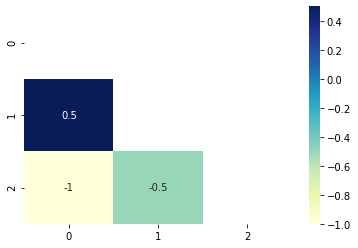

In [10]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np
 
# import file with data
data = np.asarray([[1,2,3], [3,3,1], [2,1,2]])
data = pd.DataFrame(data)
 
# creating mask
mask = np.triu(np.ones_like(data.corr()))
print(np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1))
 
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
mp.show()